In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dabl
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
12,13,Female,58,20,15
194,195,Female,47,120,16
106,107,Female,66,63,50
60,61,Male,70,46,56
85,86,Male,48,54,46
192,193,Male,33,113,8
149,150,Male,34,78,90
4,5,Female,31,17,40
198,199,Male,32,137,18
103,104,Male,26,62,55


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


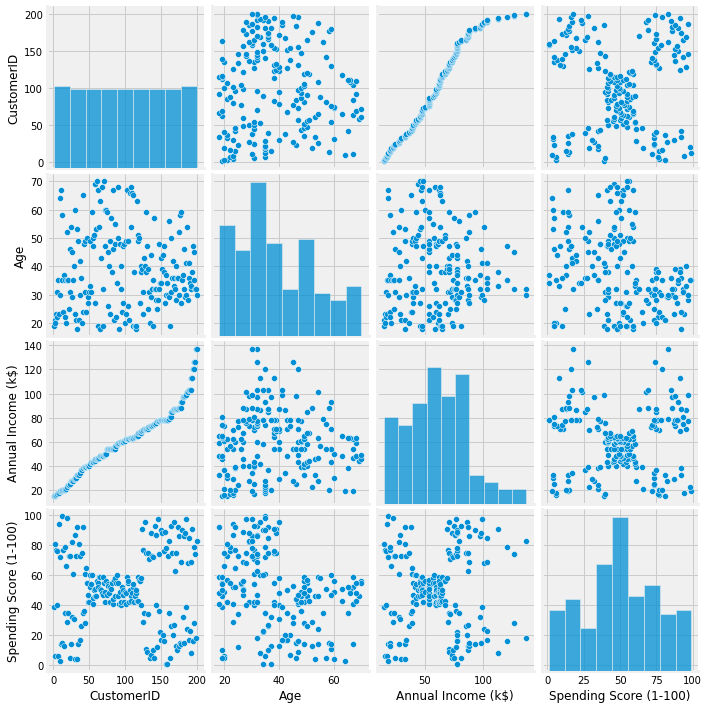

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


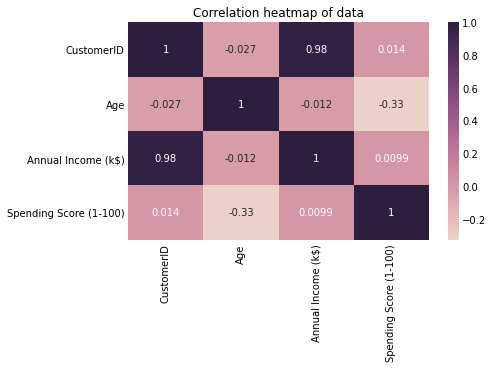

In [11]:
# lets check the Correlation Heat Map of the Data

sns.heatmap(df.corr(),annot = True, cmap = sns.cubehelix_palette(as_cmap=True))
plt.title('Correlation heatmap of data', fontsize=12)
#plt.xticks(rotation=0)
plt.show()

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=4.37E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

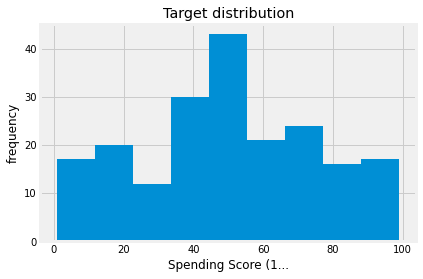

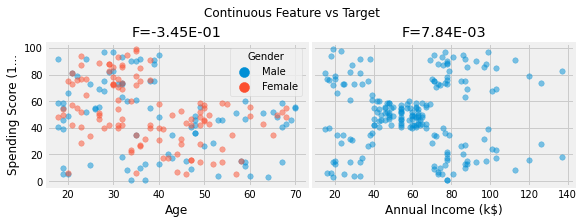

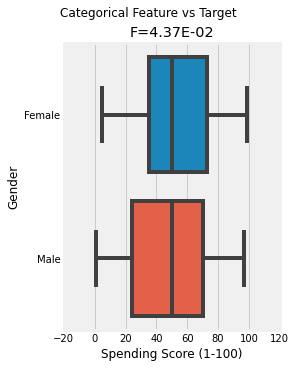

In [12]:
# lets analyze the data with respect to Spending Score
dabl.plot(df,target_col = 'Spending Score (1-100)')

In [13]:
df['Spending Score (1-100)'].max()

99

In [14]:
df[df['Gender'] == 'Female']['Spending Score (1-100)'].min()

5

In [15]:
from dabl import SimpleClassifier

In [16]:
dabl.SimpleClassifier(random_state=0).fit(df,target_col='Spending Score (1-100)')

Running DummyClassifier(random_state=0)
accuracy: 0.040 recall_macro: 0.026 precision_macro: 0.001 f1_macro: 0.002
=== new best DummyClassifier(random_state=0) (using recall_macro):
accuracy: 0.040 recall_macro: 0.026 precision_macro: 0.001 f1_macro: 0.002

Running GaussianNB()
accuracy: 0.020 recall_macro: 0.018 precision_macro: 0.004 f1_macro: 0.006
Running MultinomialNB()
accuracy: 0.040 recall_macro: 0.029 precision_macro: 0.002 f1_macro: 0.004
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.040 recall_macro: 0.029 precision_macro: 0.002 f1_macro: 0.004

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=0)
accuracy: 0.030 recall_macro: 0.020 precision_macro: 0.001 f1_macro: 0.002
Running DecisionTreeClassifier(class_weight='balanced', max_depth=84, random_state=0)
accuracy: 0.030 recall_macro: 0.022 precision_macro: 0.012 f1_macro: 0.015
Running DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.01,
               

SimpleClassifier(random_state=0)

In [17]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df.shape

(200, 5)

In [21]:
df.select_dtypes(include='object')

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female
...,...
195,Female
196,Female
197,Male
198,Male


In [22]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [24]:
df.isnull().any().any()

False

# Data Visualization

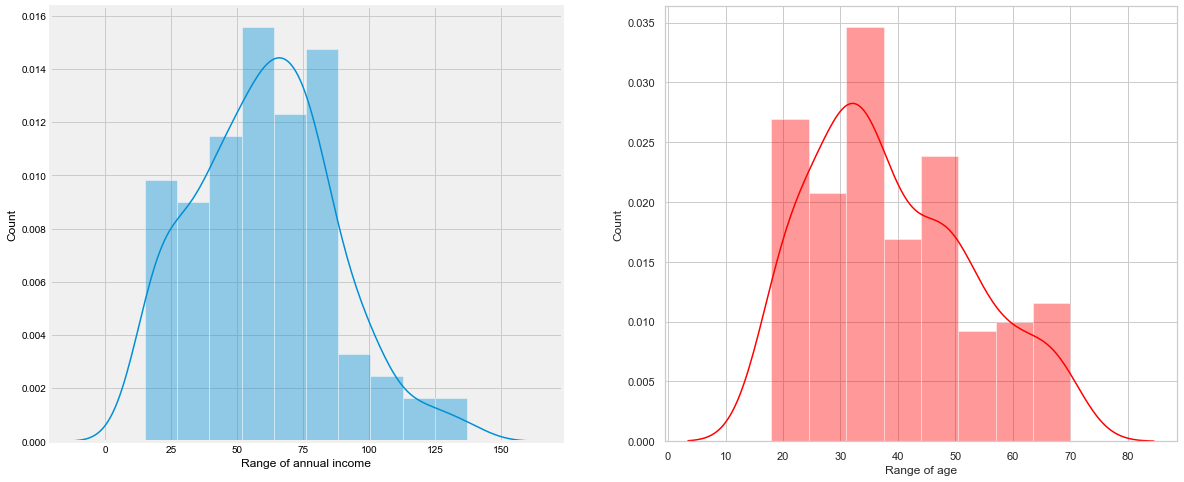

In [25]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.xlabel('Range of annual income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(df['Age'],color='red')
plt.xlabel('Range of age')
plt.ylabel('Count')

plt.show()


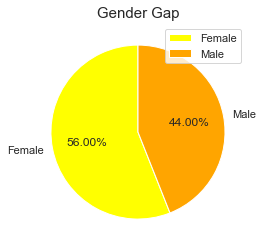

In [26]:
labels = ['Female','Male']
size = df['Gender'].value_counts()
colors = ['yellow', 'orange']
#faseleye beyne fraction ha
explode = [0,0.001]



plt.rcParams['figure.figsize'] = (4,4)
plt.pie(size,colors = colors, explode = explode, labels = labels,shadow=False,
        startangle=90 ,autopct='%.2f%%')
plt.legend()
plt.title('Gender Gap',fontsize=15)
plt.show()

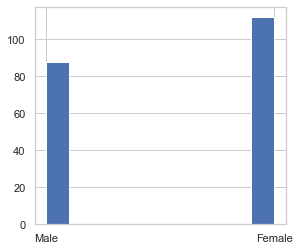

In [27]:
plt.hist(df['Gender'])
plt.show()

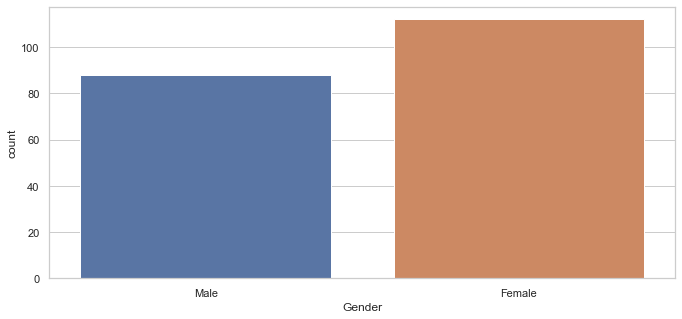

In [28]:
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(df['Gender'])
plt.show()

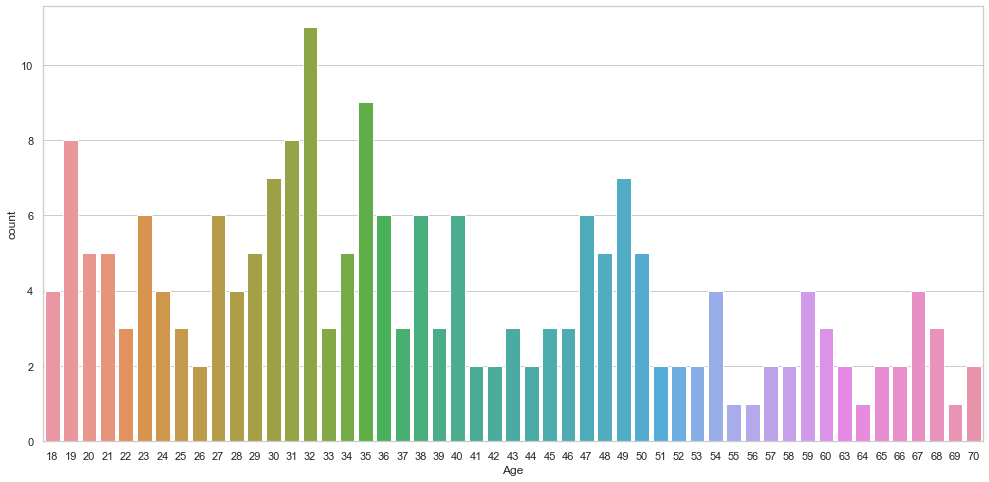

In [29]:
plt.rcParams['figure.figsize'] = (15,8)
sns.countplot(df['Age'])
plt.show()

In [31]:
df['bins'] = pd.cut(df['Age'],bins=[0,30,50,120], labels=["0-30","30-50","50+"])



In [32]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),bins
0,1,Male,19,15,39,0-30
1,2,Male,21,15,81,0-30
2,3,Female,20,16,6,0-30
3,4,Female,23,16,77,0-30
4,5,Female,31,17,40,30-50


In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),bins
0,1,Male,19,15,39,0-30
1,2,Male,21,15,81,0-30
2,3,Female,20,16,6,0-30
3,4,Female,23,16,77,0-30
4,5,Female,31,17,40,30-50


In [34]:
df.groupby(['Age', 'bins']).size()

Age  bins 
18   0-30     4
     30-50    0
     50+      0
19   0-30     8
     30-50    0
             ..
69   30-50    0
     50+      1
70   0-30     0
     30-50    0
     50+      2
Length: 153, dtype: int64

In [35]:
df.groupby(['Age', 'bins']).size().unstack(level=-1)

bins,0-30,30-50,50+
Age,,,
18,4,0,0
19,8,0,0
20,5,0,0
21,5,0,0
22,3,0,0
23,6,0,0
24,4,0,0
25,3,0,0
26,2,0,0


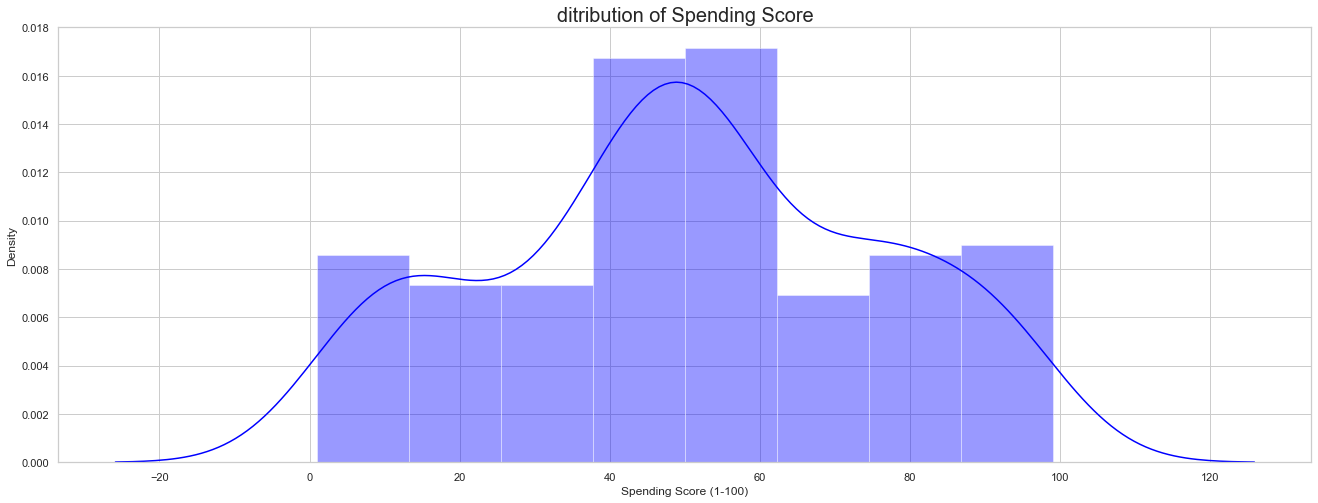

In [36]:
# lets check the ditribution of Spending Score
plt.rcParams['figure.figsize'] = (20,8)
sns.distplot(df['Spending Score (1-100)'],color='blue')
plt.title('ditribution of Spending Score', fontsize=20)
plt.show()

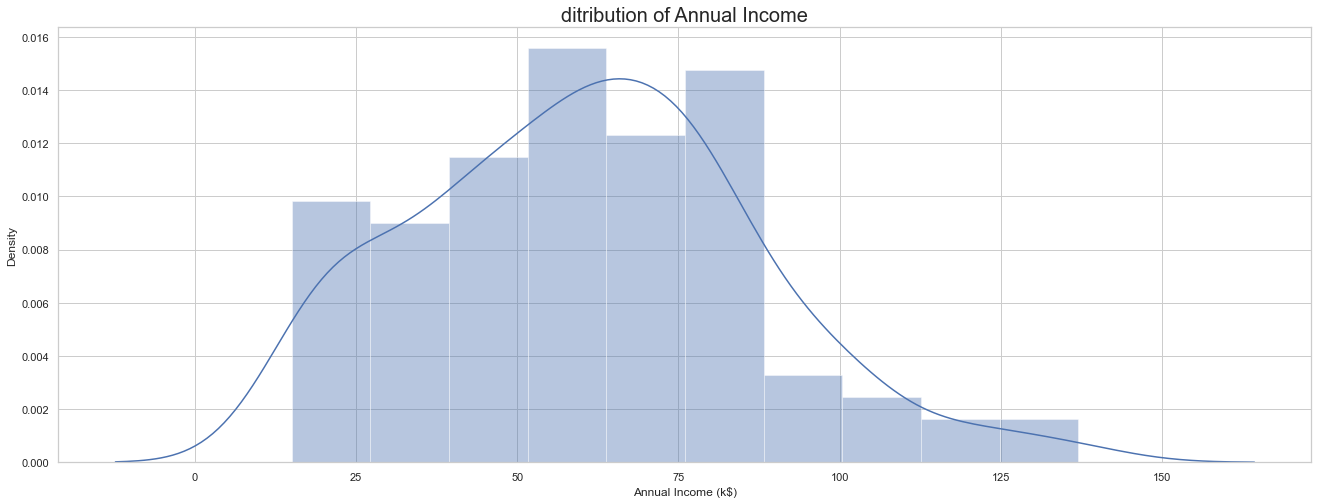

In [37]:
# lets check the ditribution of Annual Income
plt.rcParams['figure.figsize'] = (20,8)
sns.distplot(df['Annual Income (k$)'])
plt.title('ditribution of Annual Income', fontsize = 20)
plt.show()

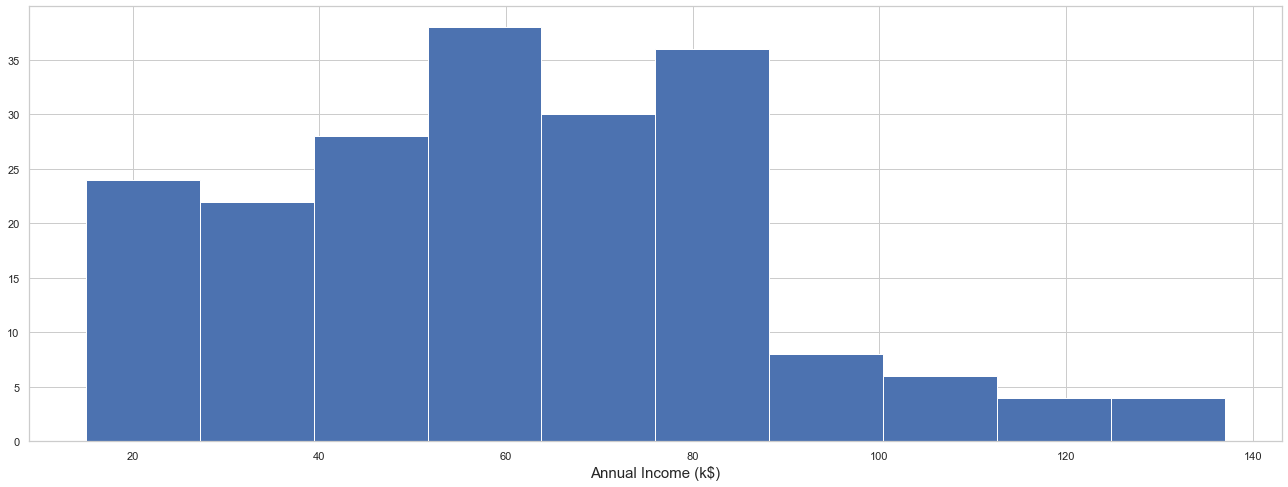

In [38]:
plt.rcParams['figure.figsize'] = (20,8)
plt.hist(df['Annual Income (k$)'])
plt.xlabel('Annual Income (k$)',fontsize =15)
plt.show()

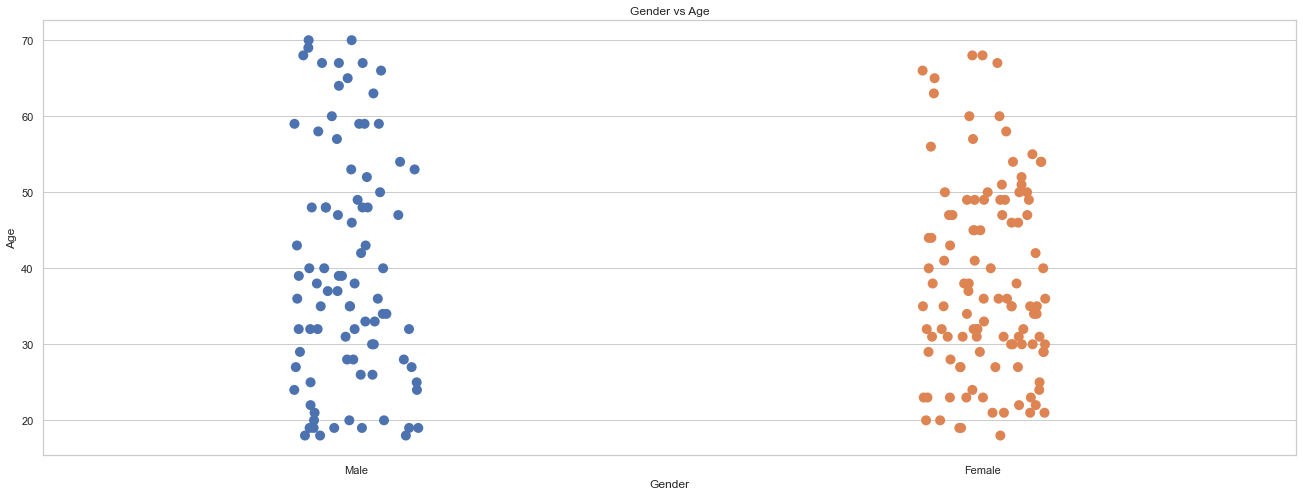

In [39]:
plt.rcParams['figure.figsize'] = (20,8)
sns.stripplot(df['Gender'], df['Age'], size = 10)
plt.title('Gender vs Age')
plt.show()

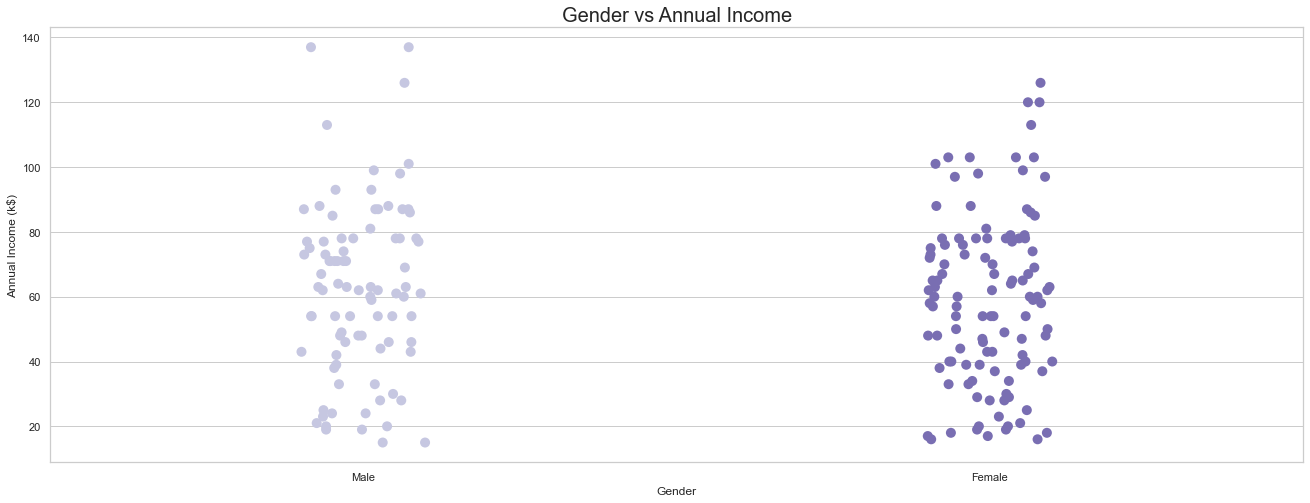

In [40]:
plt.rcParams['figure.figsize'] = (20,8)
sns.stripplot(df['Gender'], df['Annual Income (k$)'], size = 10 , palette = 'Purples')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

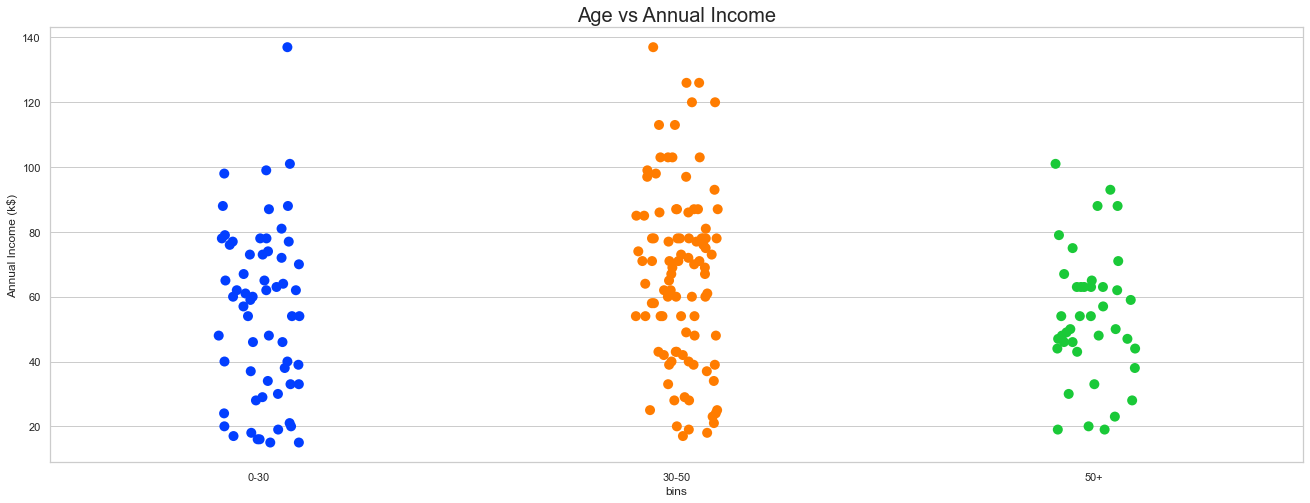

In [41]:
sns.stripplot(df['bins'],df['Annual Income (k$)'],size = 10, palette = 'bright')
plt.title('Age vs Annual Income', fontsize = 20)
plt.show()

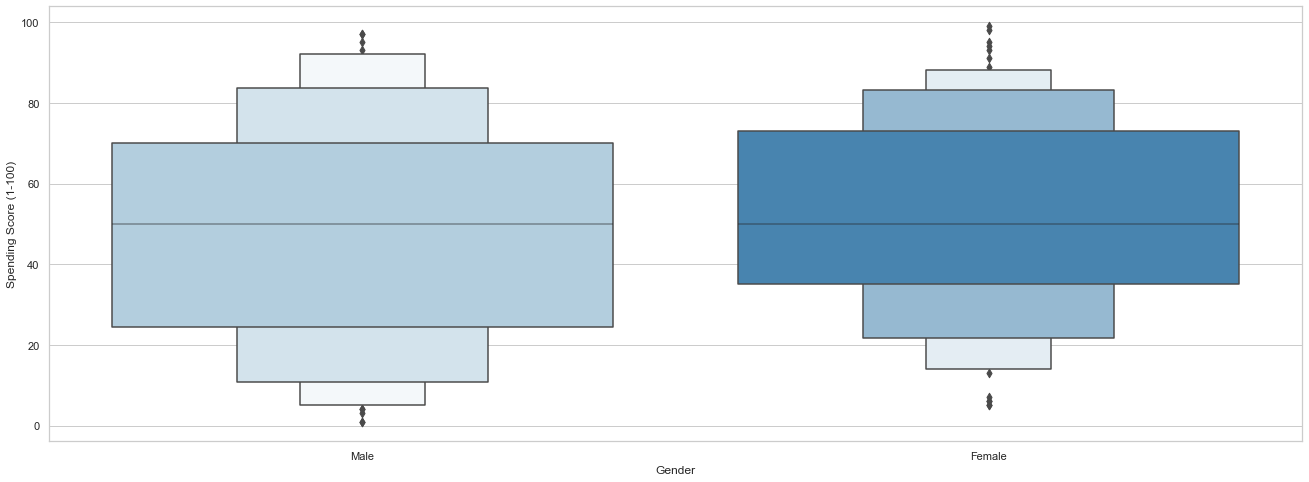

In [42]:
#  Gender vs Spendscore
sns.boxenplot(df['Gender'], df['Spending Score (1-100)'],palette='Blues')
plt.show()

# Clustering Analysis

In [43]:
# we want to perform clusters of Customers who share similar behaviour for that lets select the columns
# Spending score, and Annual Income

# Lets select the Spending score, and Annual Income Columns from the Data
x = df.loc[:,['Spending Score (1-100)', 'Annual Income (k$)']].values
print(x.shape)

(200, 2)


In [44]:
print(type(x))

<class 'numpy.ndarray'>


In [45]:
# lets also check the data, which we are going to use for the clustering analysis

x_data = pd.DataFrame(x)
x_data.sample(5)
# where o->Spending Score, and 1->Annual Income

,0,1
73,56,50
130,9,71
125,77,70
43,61,39
174,13,88


# Kmeans Algorithm

### The Elbow Method to find the No. of Optimal Clusters

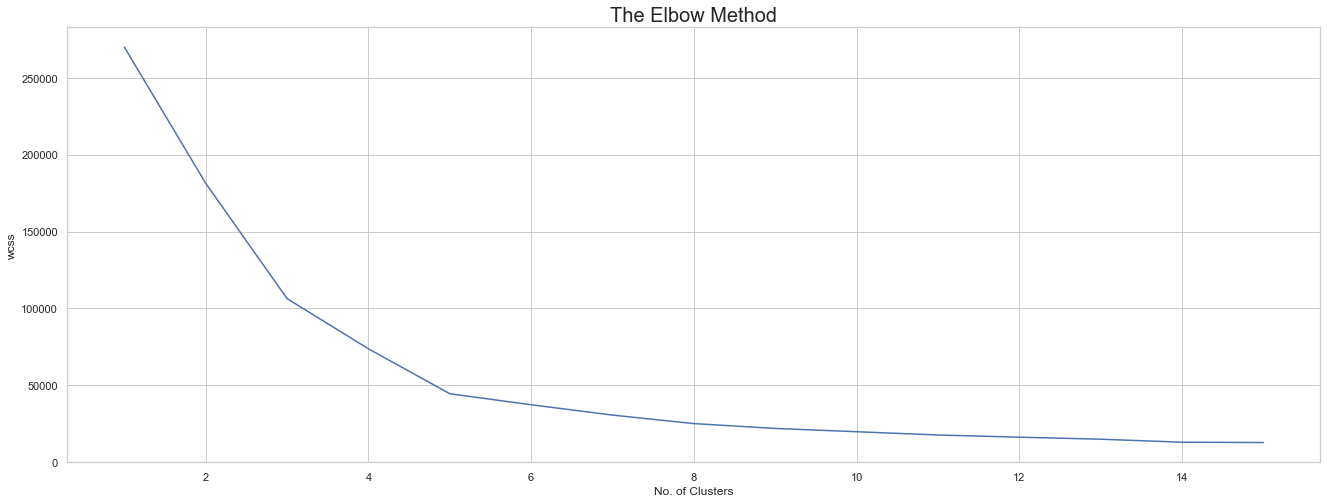

In [46]:
from sklearn.cluster import KMeans

cl = []

for i in range(1,16):
    km =KMeans(n_clusters = i, max_iter = 200, n_init = 10 )
    km.fit(x)
    cl.append(km.inertia_)
    
plt.plot(range(1, 16), cl)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

## Visualizing the Clusters

In [47]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

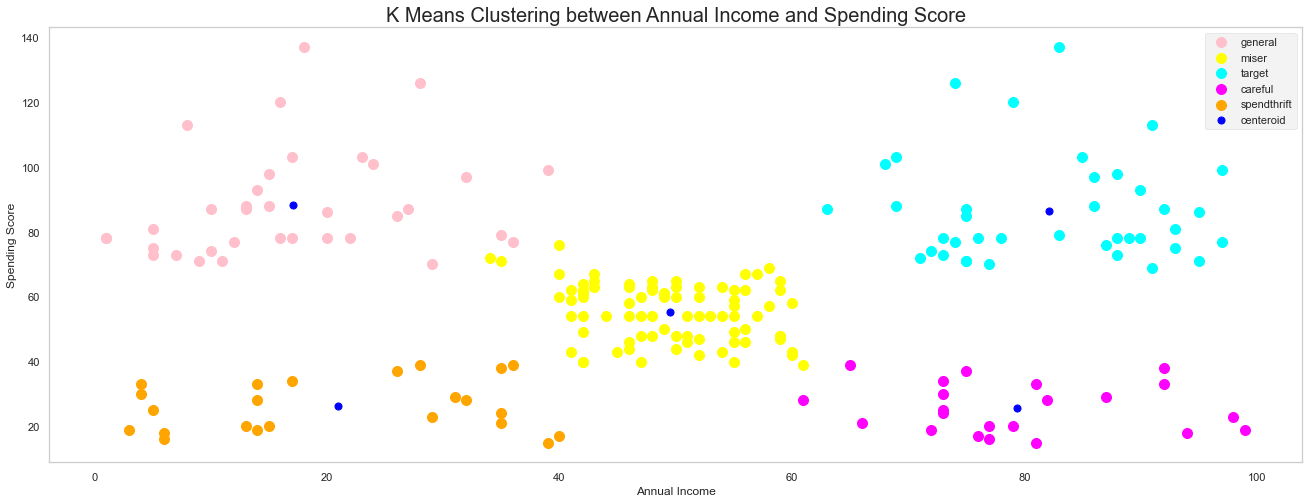

In [48]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'general')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'miser')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'careful')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'spendthrift')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


In [49]:
km.score(x)

-44448.45544793371

In [50]:
km.cluster_centers_[:, 1]

array([88.2       , 55.2962963 , 86.53846154, 25.72727273, 26.30434783])

In [51]:
x[y_means == 0, 0]

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18], dtype=int64)

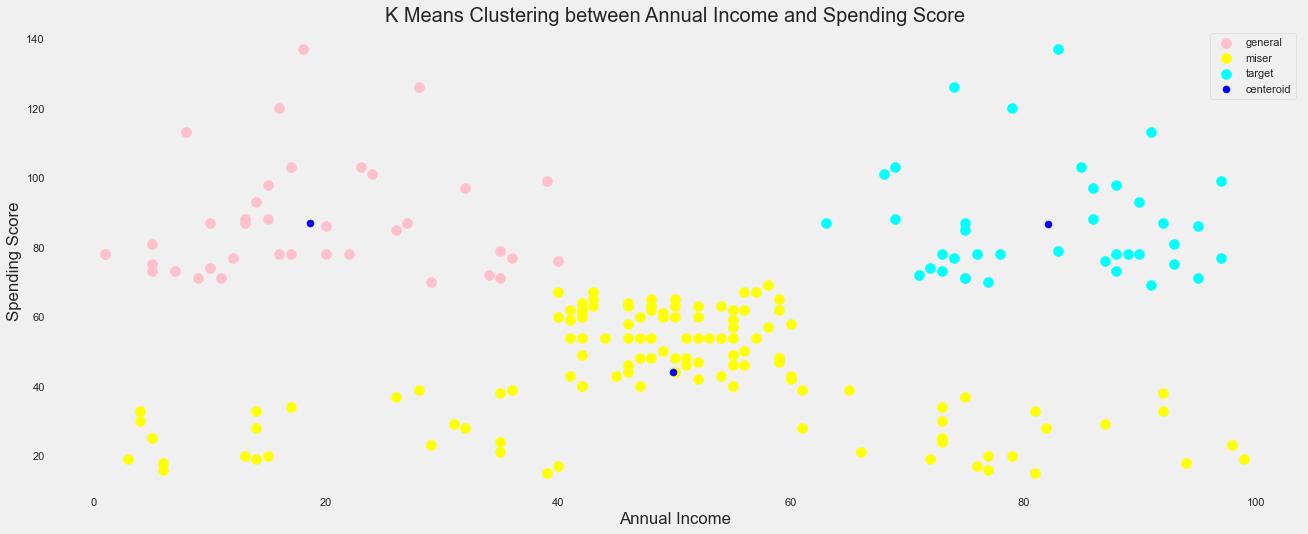

In [52]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'general')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'miser')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


In [53]:
km.score(x)

-106348.37306211118

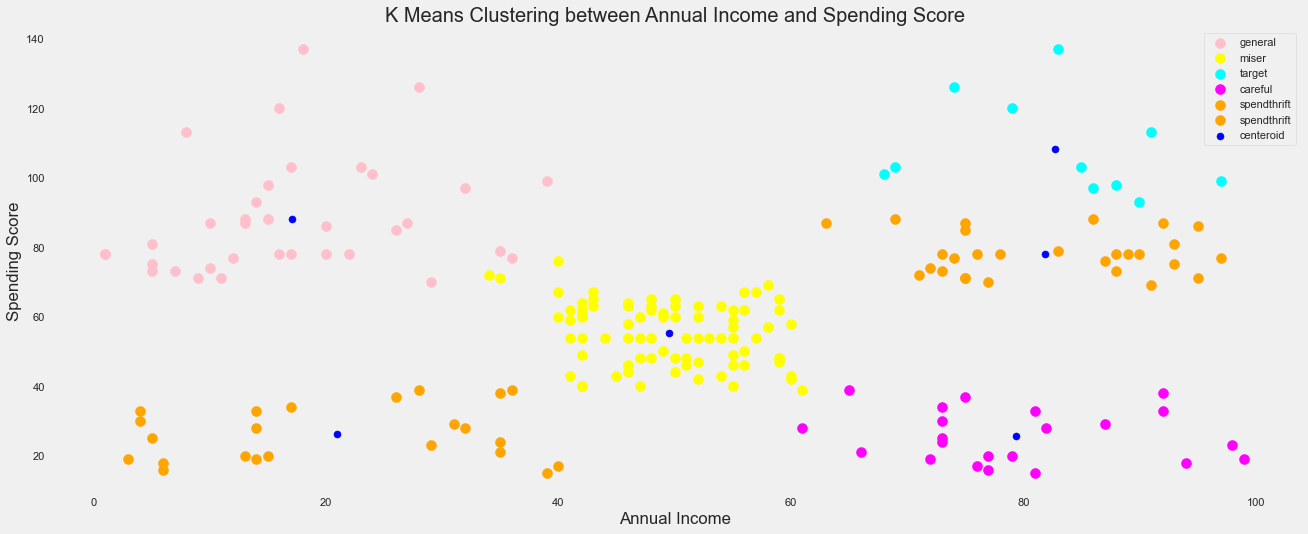

-37265.86520484347

In [54]:
km = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'general')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'miser')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'careful')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'spendthrift')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 100, c = 'orange', label = 'spendthrift')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

km.score(x)

## Silhouette for finding the right No.of clusters

In [55]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [56]:
silhouette = []

for n_clusters in range(2, 16):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99, n_init=10)
    cluster_labels = kmeans.fit_predict(x)

    centers = kmeans.cluster_centers_

    score = silhouette_score(x, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.39564531743995546
For n_clusters = 3, silhouette score is 0.46761358158775435
For n_clusters = 4, silhouette score is 0.4931963109249047
For n_clusters = 5, silhouette score is 0.553931997444648
For n_clusters = 6, silhouette score is 0.53976103063432
For n_clusters = 7, silhouette score is 0.5264283703685728
For n_clusters = 8, silhouette score is 0.45827056882053113
For n_clusters = 9, silhouette score is 0.4578565089921486
For n_clusters = 10, silhouette score is 0.46188484812005554
For n_clusters = 11, silhouette score is 0.437841976811071
For n_clusters = 12, silhouette score is 0.42466125581857567
For n_clusters = 13, silhouette score is 0.4353362225502005
For n_clusters = 14, silhouette score is 0.4296821735179073
For n_clusters = 15, silhouette score is 0.4244262601912448


Text(0.5, 0.98, 'Finding the right number of clusters')

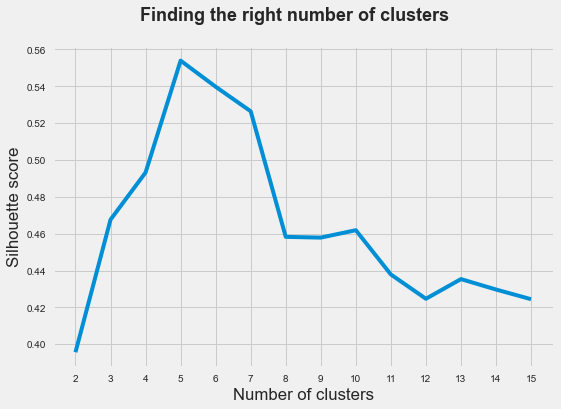

In [57]:
plt.style.use('fivethirtyeight')

silhouette_fig, ax = plt.subplots()

ax.plot(range(2, 16), silhouette)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')

ax.set_xticks(np.arange(2, 16, 1))

silhouette_fig.suptitle("Finding the right number of clusters", weight = 'bold', size = 18)

### Plotting Silhouettes to check for optimal number of clusters

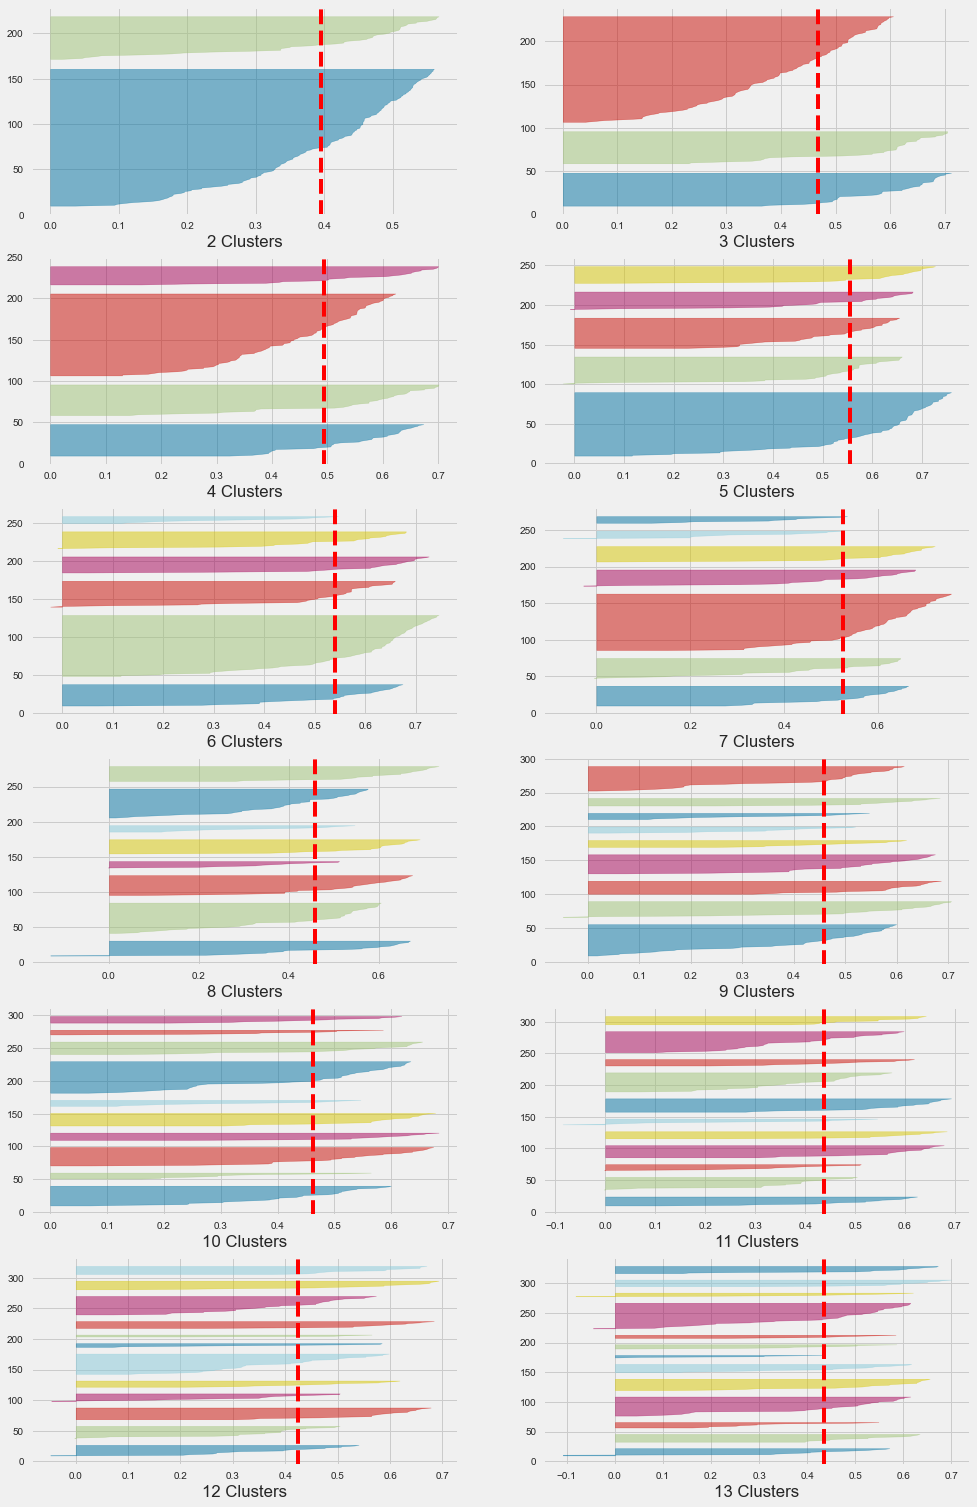

In [58]:
fig, ax = plt.subplots(6, 2, figsize=(15,25))
for i in [2, 3, 4, 5, 6 ,7, 8, 9, 10, 11, 12, 13]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters = i, random_state = 99, n_init=10)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)
    visualizer.ax.set_xlabel(f"{i} Clusters")